# Feature Extraction - Image Segmentation

In the previous activity, we did feature extraction from images using ImageJ. But what if we want to integrate 
feature extraction if we have repetitive imaging experiments? We can automate image feature extraction in 
three steps: **segmentation, morphological operations, and blob analysis**. Automating feature extraction helps 
us efficiently gather training data for machine learning. In this activity we begin with **Image Segmentation**.

In image segmentation, a region of interest (ROI) is picked out from the rest of the image or background such 
that further processing can be done on it. Selection rules are based on features unique to the ROI. For grayscale images, segmentation can be done through thresholding if the ROI has a distinct grayscale range from the background. 

In [2]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

plt.rcParams["figure.figsize"] = (4,4)
# plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["savefig.pad_inches"] = 0.1

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

## Segmentation by thresholding

(-0.5, 1127.5, 365.5, -0.5)

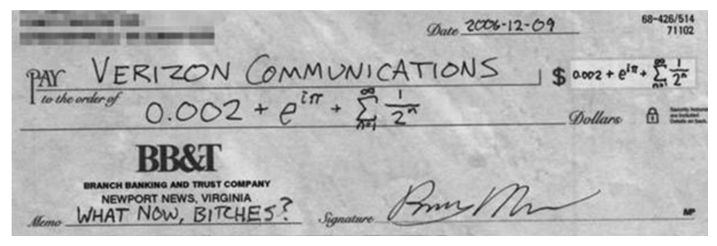

In [7]:
grayscale_check = Image.open("grayscale check.png")
grayscale_check = np.array(grayscale_check.convert("L"))

plt.figure(figsize = (9, 4))
plt.imshow(grayscale_check, cmap = "gray")
plt.axis("off")

(-0.5, 1127.5, 365.5, -0.5)

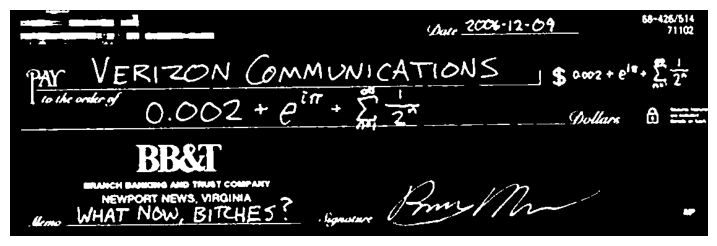

In [54]:
grayscale_check_new = grayscale_check < 125

plt.figure(figsize = (9, 4))
plt.imshow(grayscale_check_new, cmap = "gray")
plt.axis("off")

Text(0.5, 1.0, 'Threshold')

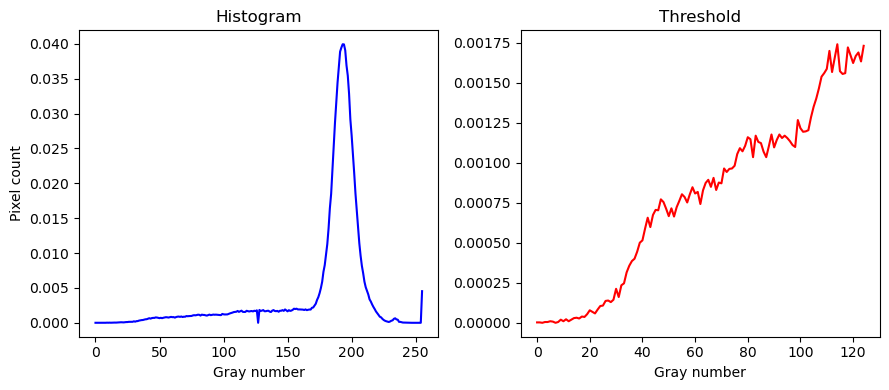

In [39]:
check_hist, check_edge = np.histogram(grayscale_check, 256, density = True)
check_threshold = check_hist[0:125]

fig, ax = plt.subplots(1, 2, figsize = (9, 4), tight_layout = True)
ax[0].plot(check_hist, color = "blue")
ax[0].set_xlabel("Gray number")
ax[0].set_ylabel("Pixel count")
ax[0].set_title("Histogram")
ax[1].plot(check_threshold, color = "red")
ax[1].set_xlabel("Gray number")
ax[1].set_title("Threshold")

From the histogram shown above, the large peak corresponds to the background pixels. They occupy more space than the text. We can choose another threshold values that will clip values below the peak at around 200.

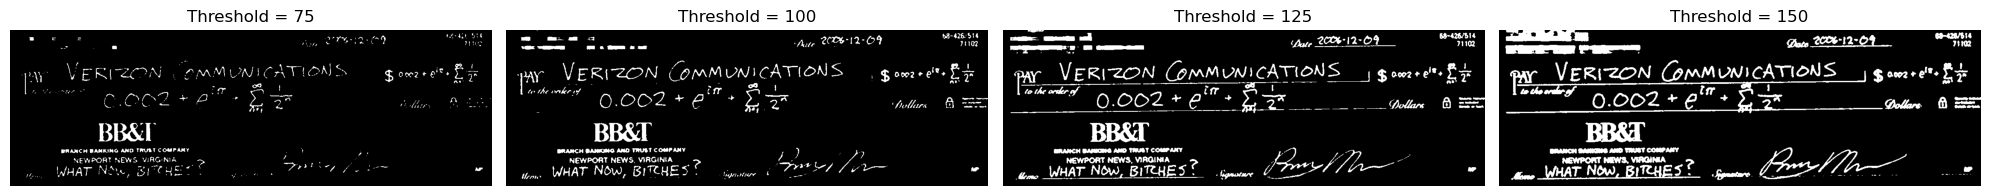

In [80]:
fig, ax = plt.subplots(1, 4, figsize = (20, 10), tight_layout = True)
thresholds = [75, 100, 125, 150]

for i, clip in enumerate(thresholds):
    ax[i].imshow(grayscale_check < clip, cmap = "gray")
    ax[i].set_title("Threshold = {}".format(clip))
    ax[i].axis("off")